In [4]:
from lib import *

%matplotlib inline

In [5]:
path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VUV/joython/"

for run in range(1):
    Run_props=open_run_properties(run,"macros/APSAIA_VUV.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    Peak_vars=open_run_var(run_path,"Peak_vars"    ,Run_props["Channels"],compressed=compress)
    Charge_vars=open_run_var(run_path,"Charge_vars",Run_props["Channels"],compressed=compress)
    Pedestal_vars=open_run_var(run_path,"Pedestal_vars",Run_props["Channels"],compressed=compress)



(0.0, 1000.0)

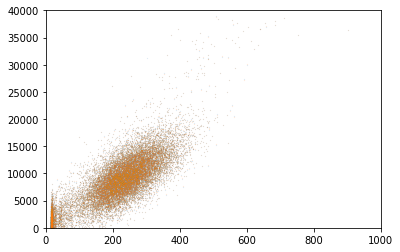

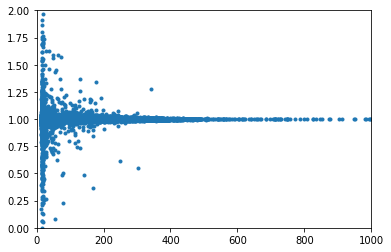

In [6]:
df = VARsAsDataFrame((Peak_vars,Charge_vars,Pedestal_vars))

for ch in [0]:
    plt.plot(df["Peak"][ch],df["ChargeRange"][ch],'.',markersize=0.1)
    plt.plot(df["Peak"][ch],df["ChargePeakRange"][ch],'.',markersize=0.1)
plt.xlim([0,1000])
plt.ylim([0,40000])

plt.figure()
plt.plot(df["Peak"][ch],df["ChargePeakRange"][ch]/df["ChargeRange"][ch],'.')
plt.ylim(0,2)
plt.xlim([0,1000])